### Raffi Argianda
### 221351112
### Malam B

### Load DataSet

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [43]:
file_path = "Groceries_dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Analisa Data

In [44]:
# Tampilkan informasi awal dataset
print("Priview Dataset : ")
print(data.head())
print("\n\nInfo Dataset : ")
print(data.info())
print("\nStatistik Deskriptif Kolom Numerik : ")
print(data.describe())

Priview Dataset : 
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


Info Dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Statistik Deskriptif Kolom Numerik : 
       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000


In [45]:
# 1. Analisis Kolom 'Member_number'BaseExceptionGroup
# Menghitung total member

total_member = data['Member_number'].unique()
print(f'\n\nTotal Member : {total_member}')



Total Member : [1808 2552 2300 ... 3607 4587 2417]


In [46]:
# Top 5 anggota dengan transaksi terbanyak
top_members = data['Member_number'].value_counts().head()
print('\nTop 5 Anggota dengan Transaksi Terbanyak')
print(top_members)


Top 5 Anggota dengan Transaksi Terbanyak
Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
Name: count, dtype: int64


In [47]:
# 2. Analisis Kolom 'Date' 
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Rentang waktu dataset
start_date = data['Date'].min()
end_date = data['Date'].max()
print(f'\nRentang waktu data : {start_date} hingga {end_date}')


Rentang waktu data : 2014-01-01 00:00:00 hingga 2015-12-30 00:00:00


In [48]:
# Hitung jumlah transaksi per bulan
monthly_transactions = data['Date'].dt.to_period('M').value_counts().sort_index()
print('\nJumlah transaksi perbulan : ')
print(monthly_transactions)


Jumlah transaksi perbulan : 
Date
2014-01    1527
2014-02    1437
2014-03    1411
2014-04    1561
2014-05    1615
2014-06    1570
2014-07    1576
2014-08    1575
2014-09    1472
2014-10    1591
2014-11    1469
2014-12    1473
2015-01    1797
2015-02    1560
2015-03    1722
2015-04    1699
2015-05    1793
2015-06    1694
2015-07    1724
2015-08    1921
2015-09    1587
2015-10    1670
2015-11    1785
2015-12    1536
Freq: M, Name: count, dtype: int64


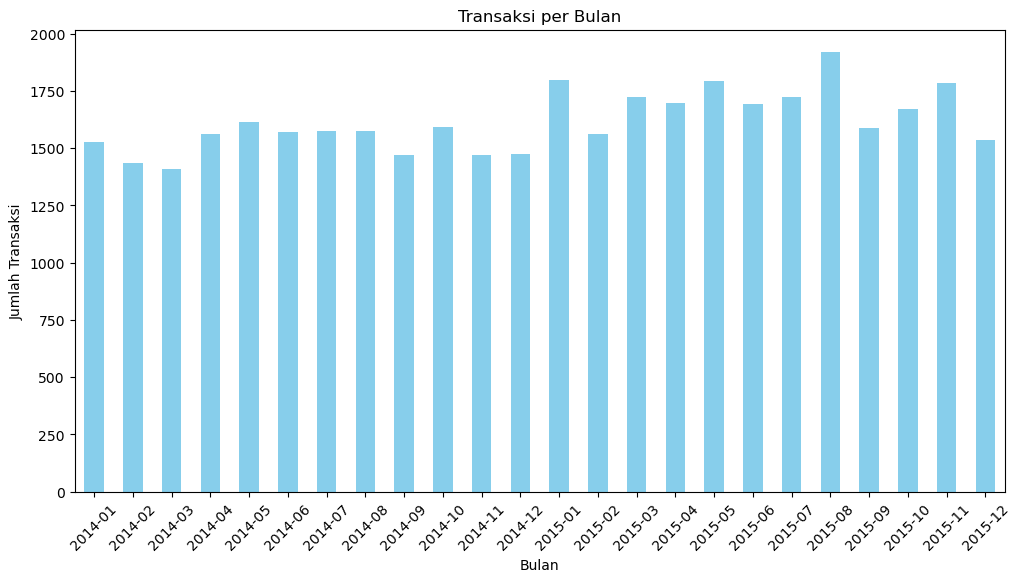

In [49]:
# Visualisasi jumlah transaksi per bulan
plt.figure(figsize=(12,6))
monthly_transactions.plot(kind = 'bar', title = 'Transaksi per Bulan', color = 'skyblue')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation = 45)
plt.show()

In [50]:
# 3. Analisis kolom 'itemDescription'
# Barang paling sering dibeli
item_counts = data['itemDescription'].value_counts()
print('\nTop 10 Barang paling sering dibeli : ')
print(item_counts.head(10))


Top 10 Barang paling sering dibeli : 
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


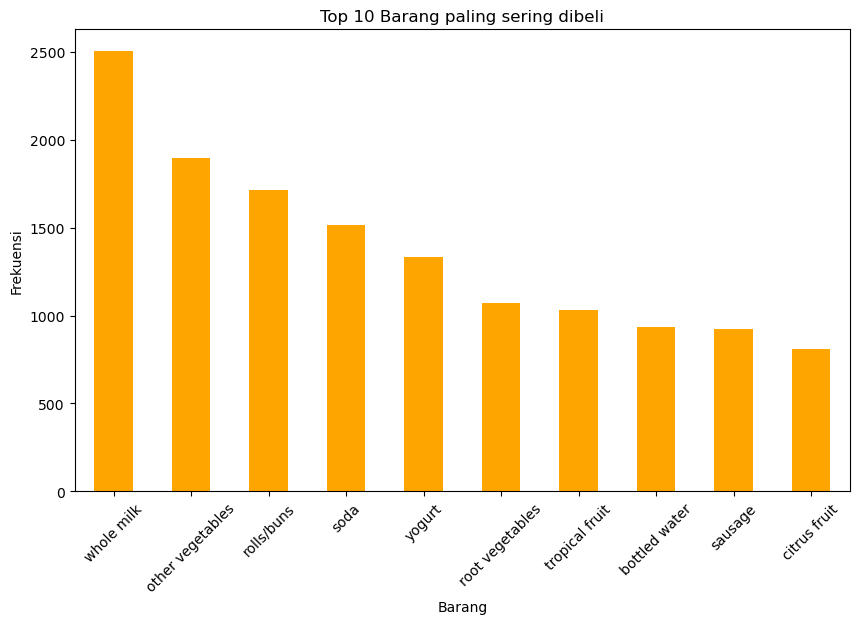

In [51]:
# Visualisasi 10 barang teratas
plt.figure(figsize=(10,6))
item_counts.head(10).plot(kind = 'bar', title = 'Top 10 Barang paling sering dibeli', color = 'orange')
plt.xlabel('Barang')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

In [52]:
# 4. Analisis gabungan
# Barang yang paling sering dibeli oleh anggota tertentu
member_id = 1808
member_items = data[data['Member_number'] == member_id]['itemDescription'].value_counts()
print(f'\nBarang paling sering dibeli oleh anggota {member_id} : ')
print(member_items)


Barang paling sering dibeli oleh anggota 1808 : 
itemDescription
tropical fruit              1
long life bakery product    1
meat                        1
sugar                       1
rolls/buns                  1
semi-finished bread         1
whole milk                  1
citrus fruit                1
candy                       1
napkins                     1
Name: count, dtype: int64


In [53]:
# Pola pembelian barang pada bulan tertentu
month = '2015-07'
monthly_items = data[data['Date'].dt.to_period('M') == month]['itemDescription'].value_counts()
print(f'\nBarang paling sering dibeli pada {month} : ')
print(member_items)


Barang paling sering dibeli pada 2015-07 : 
itemDescription
tropical fruit              1
long life bakery product    1
meat                        1
sugar                       1
rolls/buns                  1
semi-finished bread         1
whole milk                  1
citrus fruit                1
candy                       1
napkins                     1
Name: count, dtype: int64


In [54]:
# Statistik tambahan : jumlah barang unik
print('\nJumlah barang unik : ')
print(data['itemDescription'].nunique())


Jumlah barang unik : 
167


### Data Preprocessing

In [55]:
# Persiapan data : mengelompokan item berdasarkan Member_number dan Date
transactions = data.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)

In [56]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encode = pd.DataFrame(te_ary, columns=te.columns_)
df_encode.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Modeling

In [57]:
# --- Algoritma Apriori ---
print('\n==== Apriori ====')
frequent_itemsets_apriori = apriori(df_encode, min_support=0.005, use_colnames=True)
print('Frequent Itemsets (Apriori) : ')
print(frequent_itemsets_apriori)


==== Apriori ====
Frequent Itemsets (Apriori) : 
      support                      itemsets
0    0.021386                    (UHT-milk)
1    0.008087               (baking powder)
2    0.033950                        (beef)
3    0.021787                     (berries)
4    0.016574                   (beverages)
..        ...                           ...
121  0.011629            (soda, whole milk)
122  0.005814                (soda, yogurt)
123  0.008220  (tropical fruit, whole milk)
124  0.005213      (tropical fruit, yogurt)
125  0.011161          (yogurt, whole milk)

[126 rows x 2 columns]


In [58]:
# Algoritma FP-Growth
print('\n==== FP-Growth ====')
frequent_itemsets_fpgrowth = fpgrowth(df_encode, min_support=0.005, use_colnames=True)
print('Frequent Itemsets (FP-Growth) : ')
print(frequent_itemsets_fpgrowth)


==== FP-Growth ====
Frequent Itemsets (FP-Growth) : 
      support                     itemsets
0    0.157923                 (whole milk)
1    0.051728                     (pastry)
2    0.018780                (salty snack)
3    0.085879                     (yogurt)
4    0.060349                    (sausage)
..        ...                          ...
121  0.007151   (bottled beer, whole milk)
122  0.005280  (whole milk, domestic eggs)
123  0.005614     (newspapers, whole milk)
124  0.007151   (whole milk, citrus fruit)
125  0.005012           (pork, whole milk)

[126 rows x 2 columns]


In [59]:
# Menampilkan hasil aturan asosiasi
print('\nAturan Asosiasi (Apriori) : ')
rules_apriori = association_rules(frequent_itemsets_apriori, metric='confidence', min_threshold=0.1, num_itemsets= 1)
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Aturan Asosiasi (Apriori) : 
           antecedents         consequents   support  confidence      lift
0       (bottled beer)        (whole milk)  0.007151    0.157817  0.999330
1      (bottled water)        (whole milk)  0.007151    0.117841  0.746196
2        (canned beer)        (whole milk)  0.006015    0.128205  0.811821
3       (citrus fruit)        (whole milk)  0.007151    0.134591  0.852259
4      (domestic eggs)        (whole milk)  0.005280    0.142342  0.901341
5        (frankfurter)  (other vegetables)  0.005146    0.136283  1.116150
6        (frankfurter)        (whole milk)  0.005280    0.139823  0.885388
7         (newspapers)        (whole milk)  0.005614    0.144330  0.913926
8   (other vegetables)        (whole milk)  0.014837    0.121511  0.769430
9             (pastry)        (whole milk)  0.006483    0.125323  0.793571
10         (pip fruit)        (whole milk)  0.006616    0.134877  0.854071
11              (pork)        (whole milk)  0.005012    0.135135  0.85

In [60]:
# Menampilkan hasil aturan asosiasi
print('\nAturan Asosiasi (FP-Growth) : ')
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric='confidence', min_threshold=0.1, num_itemsets = 0)
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Aturan Asosiasi (FP-Growth) : 
           antecedents         consequents   support  confidence      lift
0       (bottled beer)        (whole milk)  0.007151    0.157817  0.999330
1      (bottled water)        (whole milk)  0.007151    0.117841  0.746196
2        (canned beer)        (whole milk)  0.006015    0.128205  0.811821
3       (citrus fruit)        (whole milk)  0.007151    0.134591  0.852259
4      (domestic eggs)        (whole milk)  0.005280    0.142342  0.901341
5        (frankfurter)  (other vegetables)  0.005146    0.136283  1.116150
6        (frankfurter)        (whole milk)  0.005280    0.139823  0.885388
7         (newspapers)        (whole milk)  0.005614    0.144330  0.913926
8   (other vegetables)        (whole milk)  0.014837    0.121511  0.769430
9             (pastry)        (whole milk)  0.006483    0.125323  0.793571
10         (pip fruit)        (whole milk)  0.006616    0.134877  0.854071
11              (pork)        (whole milk)  0.005012    0.135135  0.